In [1428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1429]:
df = pd.read_excel('/home/dev/Projets/Gestion-des-analyses-de-variation/analyseVariation/v.xlsx')
df = df.dropna()
copie=df.copy()
data = df.copy()
d = df.copy()

##### Dataset avec les valeurs nulles supprimées

In [1430]:
df.head(5)

,Nom,Mesures
0,DIOUF Ndeye Fatou ( snt_1413_diouf64464 ),566
4,DIOP Mame Thierno ( snt_1413_diop59501 ),582
5,COLY ABEL FRAN?OIS GERARD ( snt_1413_cloy55299 ),596
6,FAYE Paul Makane ( snt_1413_faye64826 ),601
7,Diatta Hilaire Kalia ( snt_1413_diatta56663 ),601


#### Récuperer la liste des noms

In [1431]:
l = list(df['Nom'])
l

['DIOUF Ndeye Fatou ( snt_1413_diouf64464 )',
 'DIOP Mame Thierno ( snt_1413_diop59501 )',
 'COLY ABEL FRAN?OIS GERARD ( snt_1413_cloy55299 )',
 'FAYE Paul Makane ( snt_1413_faye64826 )',
 'Diatta Hilaire Kalia ( snt_1413_diatta56663 )',
 'CISSE Awa ( snt_1413_cisse58400 )',
 'MBAYE Djibril ( snt_1413_mbaye65011 )',
 'FALL Cheikh Mouhamadou Falilou Mbacke ( snt_1413_fall63487 )',
 'Kanfany Paulin ( snt_1413_kanfany54998 )',
 'DIOP Mame Thierno ( snt_1413_diop59501 )',
 'BAAL Maimouna ( snt_1413_baal57300 )',
 'NIANG Serigne Fallou ( snt_1413_niang63448 )',
 'BADJI Jean Claude Joseph ( snt_1413_badji65010 )',
 'DIOUF Seydina Limamoulaye ( snt_1413_diouf65008 )',
 'DIOP Mouhamed ( snt_1413_diop63458 )',
 'MBAYE Ndeye Dior ( snt_1413_mbaye63241 )',
 'COLY Oumou Kalsom ( snt_1413_coly29557 )',
 'MARA Assane ( snt_1413_mara63464 )',
 'DIOUF Saly ( snt_1413_diouf63447 )',
 'BASSE Lisse ( snt_1413_basse63230 )',
 'KA Amadou ( snt_1413_ka65012 )',
 'SARR Alioune Bintou ( snt_1413_sarr63264 )',

#### Faire une fonction qui va convertir tous les chaines en entier 

In [1432]:
# Faire une fonction qui extrait les chaines de caractères et les convertissent en entier
mesures = list(df['Mesures'].dropna())

def replace_comma_with_dot(lst):
    """Replace commas with dots in all elements of a list."""
    new_lst = []
    for element in lst:
        if isinstance(element, str) and ',' in element:
            element = element.replace(',', '.').split('.')[0]
        new_lst.append(int(element))
    return new_lst

#### Démo

In [1433]:
replace_comma_with_dot(mesures)

[566,
 582,
 596,
 601,
 601,
 637,
 640,
 646,
 514,
 582,
 570,
 1249,
 1290,
 1309,
 1374,
 1377,
 1386,
 1420,
 1448,
 1475,
 1486,
 504,
 1563,
 889,
 1846,
 40,
 570,
 129,
 1290,
 709,
 1374,
 1377,
 1286,
 1420,
 448,
 795,
 186,
 504,
 1563,
 689,
 846,
 2040]

#### Construire un nouveau dataset avec les deux listes 

In [1434]:
# Construire un nouveau dataset
def dataset(list1,liste2):
    data = list(zip(list1,replace_comma_with_dot(liste2)))
    new_df = pd.DataFrame(data, columns=['Nom', 'Mesures'])
    return new_df

In [1435]:
r = dataset(l,mesures)
r

,Nom,Mesures
0,DIOUF Ndeye Fatou ( snt_1413_diouf64464 ),566
1,DIOP Mame Thierno ( snt_1413_diop59501 ),582
2,COLY ABEL FRAN?OIS GERARD ( snt_1413_cloy55299 ),596
3,FAYE Paul Makane ( snt_1413_faye64826 ),601
4,Diatta Hilaire Kalia ( snt_1413_diatta56663 ),601
5,CISSE Awa ( snt_1413_cisse58400 ),637
6,MBAYE Djibril ( snt_1413_mbaye65011 ),640
7,FALL Cheikh Mouhamadou Falilou Mbacke ( snt_14...,646
8,Kanfany Paulin ( snt_1413_kanfany54998 ),514
9,DIOP Mame Thierno ( snt_1413_diop59501 ),582


In [1436]:
r[(r["Mesures"]<650)|(r['Mesures']> 1000)]

,Nom,Mesures
0,DIOUF Ndeye Fatou ( snt_1413_diouf64464 ),566
1,DIOP Mame Thierno ( snt_1413_diop59501 ),582
2,COLY ABEL FRAN?OIS GERARD ( snt_1413_cloy55299 ),596
3,FAYE Paul Makane ( snt_1413_faye64826 ),601
4,Diatta Hilaire Kalia ( snt_1413_diatta56663 ),601
5,CISSE Awa ( snt_1413_cisse58400 ),637
6,MBAYE Djibril ( snt_1413_mbaye65011 ),640
7,FALL Cheikh Mouhamadou Falilou Mbacke ( snt_14...,646
8,Kanfany Paulin ( snt_1413_kanfany54998 ),514
9,DIOP Mame Thierno ( snt_1413_diop59501 ),582


#### Fonctions pour visualization des valeurs aberrantes

In [1437]:
def boxplot(data):
    plt.figure(figsize = (16,6))
    sns.boxplot(data = data)
    plt.grid()

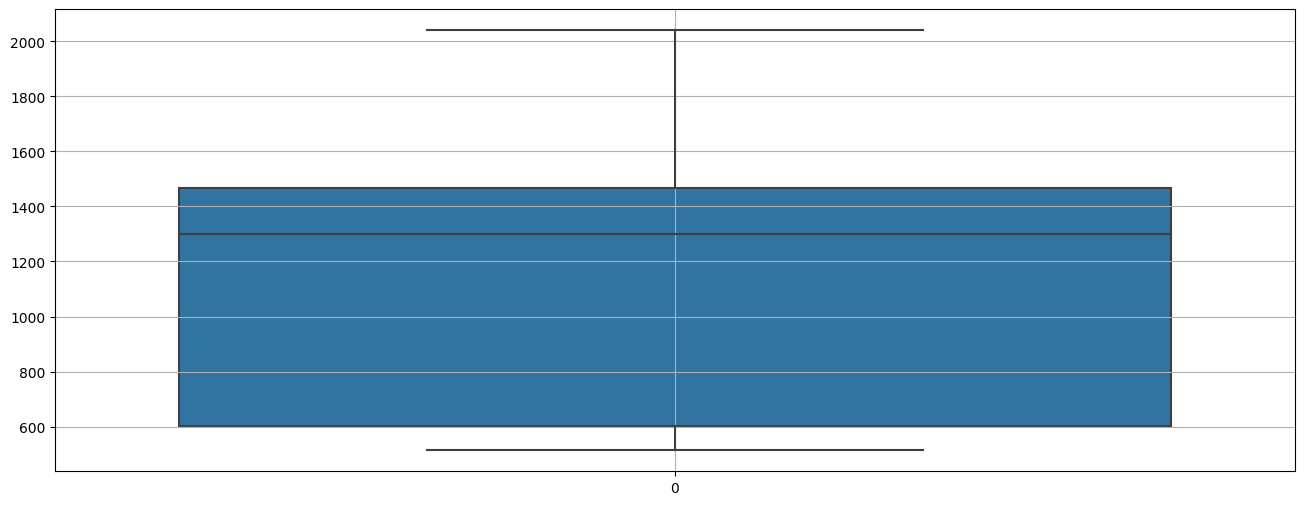

In [1438]:
boxplot(new_df['Mesures'])

#### Valeurs Non-aberrantes

In [1439]:
# result = [x for x in new_df['Mesures'] if new_df[x] > 550 and new_df[x] < 1000]
# print(result)



#### Les valeurs aberrantes

In [1440]:
features = ['Mesures']

In [1441]:
def impute_outliers(df, feature):
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound

#### Enlever les valeurs aberrantes en applicant la fonction

In [1442]:
for feature in features:
    # print(feature)
    impute_outliers(new_df, feature)

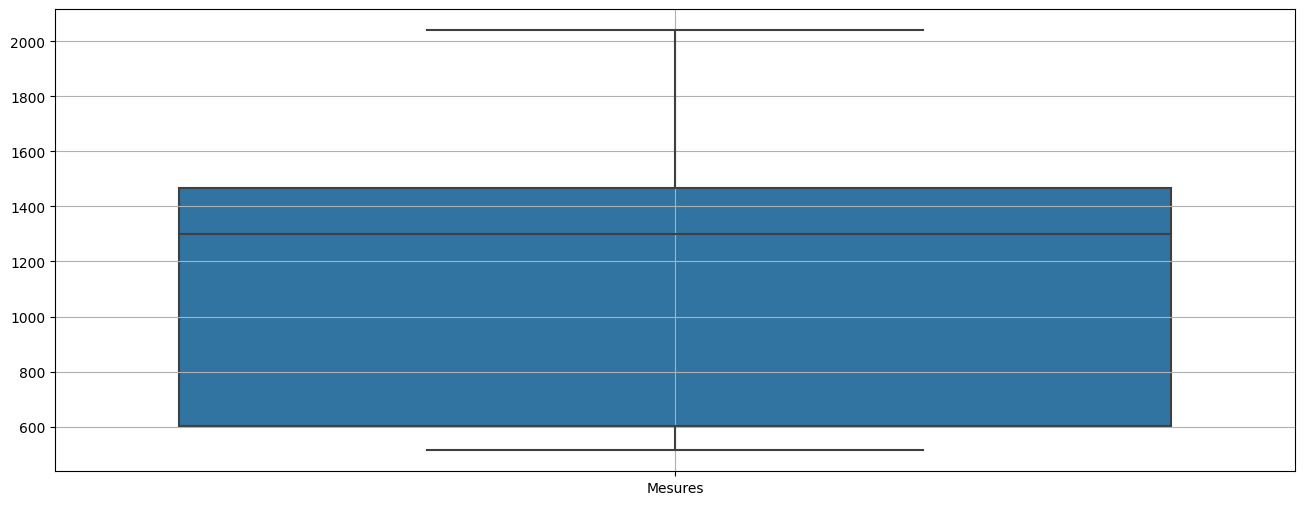

In [1443]:
boxplot(new_df[features])

##### Un sous dataset contenant les valeurs aberrantes

In [1444]:
def subdataset_outliers(df, feature):
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75) 
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

In [1445]:
for feature in features:
    # print(feature)
    subdataset_outlier =subdataset_outliers(new_df, feature)

In [1446]:
subdataset_outlier[features].max()

Mesures   NaN
dtype: float64

In [1447]:
subdataset_outlier[features].shape

(0, 1)

#### Préptraiter les données

In [1448]:
def preprocess_data(data):
    # Remplacer les valeurs manquantes par la médiane de la colonne
    data = data.fillna(data.median())
    # Eliminer les observations ayant des valeurs manquantes
    data = data.dropna()
    return data

In [1449]:
p = preprocess_data(d)
p

/tmp/ipykernel_80299/299479283.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median())


,Nom,Mesures
0,DIOUF Ndeye Fatou ( snt_1413_diouf64464 ),566
4,DIOP Mame Thierno ( snt_1413_diop59501 ),582
5,COLY ABEL FRAN?OIS GERARD ( snt_1413_cloy55299 ),596
6,FAYE Paul Makane ( snt_1413_faye64826 ),601
7,Diatta Hilaire Kalia ( snt_1413_diatta56663 ),601
8,CISSE Awa ( snt_1413_cisse58400 ),637
9,MBAYE Djibril ( snt_1413_mbaye65011 ),640
10,FALL Cheikh Mouhamadou Falilou Mbacke ( snt_14...,646
11,Kanfany Paulin ( snt_1413_kanfany54998 ),514
12,DIOP Mame Thierno ( snt_1413_diop59501 ),"582,0"


In [1450]:
mesure = list(p['Mesures'])
nom = list(p['Nom'])

In [1451]:
nouveau = dataset(nom,mesure)
nouveau

,Nom,Mesures
0,DIOUF Ndeye Fatou ( snt_1413_diouf64464 ),566
1,DIOP Mame Thierno ( snt_1413_diop59501 ),582
2,COLY ABEL FRAN?OIS GERARD ( snt_1413_cloy55299 ),596
3,FAYE Paul Makane ( snt_1413_faye64826 ),601
4,Diatta Hilaire Kalia ( snt_1413_diatta56663 ),601
5,CISSE Awa ( snt_1413_cisse58400 ),637
6,MBAYE Djibril ( snt_1413_mbaye65011 ),640
7,FALL Cheikh Mouhamadou Falilou Mbacke ( snt_14...,646
8,Kanfany Paulin ( snt_1413_kanfany54998 ),514
9,DIOP Mame Thierno ( snt_1413_diop59501 ),582


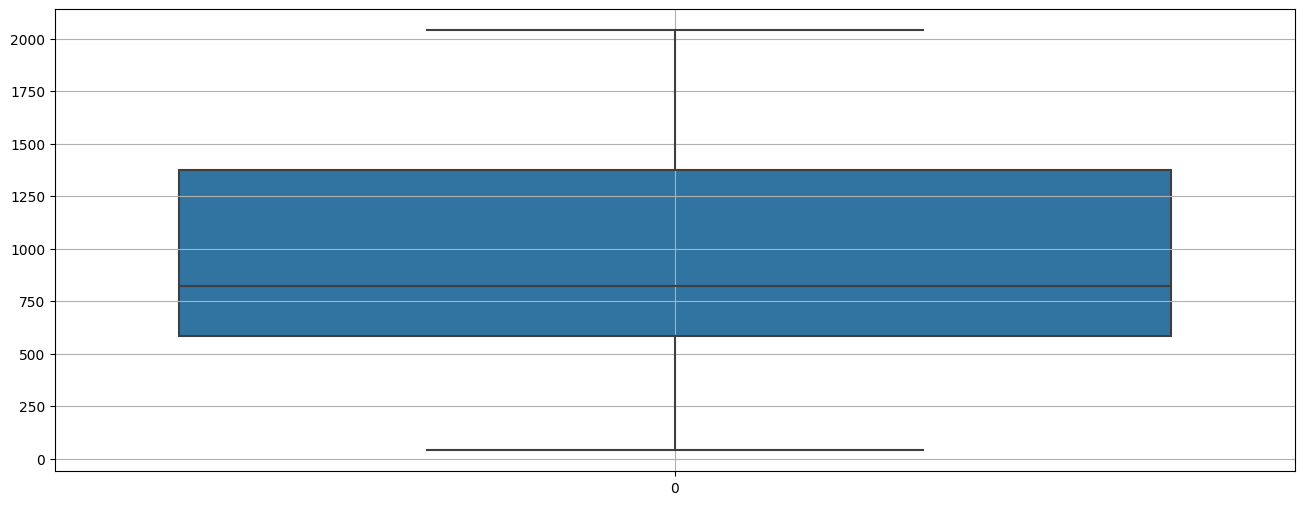

In [1452]:
boxplot(nouveau['Mesures'])

In [1453]:
def detect_outliers(data, threshold=3):
    # Calculer la moyenne et l'écart-type pour chaque colonne
    mean = data.mean(axis=0)
    std = data.std(axis=0)

    # Calculer le score Z pour chaque observation
    z_scores = np.abs((data-mean)/std)

    # Identifier les observations qui ont un score Z supérieur au seuil
    is_outlier = z_scores > threshold

    # Séparer les observations en deux groupes: valeurs aberrantes et valeurs non aberrantes
    outliers = data[is_outlier.any(axis=1)]
    non_outliers = data[~is_outlier.any(axis=1)]

    return outliers, non_outliers

In [1454]:
detect_outliers(nouveau)

/tmp/ipykernel_80299/3755525679.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = data.mean(axis=0)
/tmp/ipykernel_80299/3755525679.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = data.std(axis=0)


(Empty DataFrame
 Columns: [Nom, Mesures]
 Index: [],
                                                   Nom  Mesures
 0           DIOUF Ndeye Fatou ( snt_1413_diouf64464 )      566
 1            DIOP Mame Thierno ( snt_1413_diop59501 )      582
 2    COLY ABEL FRAN?OIS GERARD ( snt_1413_cloy55299 )      596
 3             FAYE Paul Makane ( snt_1413_faye64826 )      601
 4       Diatta Hilaire Kalia ( snt_1413_diatta56663 )      601
 5                   CISSE Awa ( snt_1413_cisse58400 )      637
 6               MBAYE Djibril ( snt_1413_mbaye65011 )      640
 7   FALL Cheikh Mouhamadou Falilou Mbacke ( snt_14...      646
 8            Kanfany Paulin ( snt_1413_kanfany54998 )      514
 9            DIOP Mame Thierno ( snt_1413_diop59501 )      582
 10               BAAL Maimouna ( snt_1413_baal57300 )      570
 11       NIANG Serigne Fallou ( snt_1413_niang63448 )     1249
 12   BADJI Jean Claude Joseph ( snt_1413_badji65010 )     1290
 13  DIOUF Seydina Limamoulaye ( snt_1413_diouf650

In [1455]:
subdataset_outlier[features]

,Mesures


#### Détecter les valeurs Aberrantes

In [1456]:
import numpy as np

def detect_outliers(data, threshold=3):
    """
    Cette fonction prend en entrée un tableau NumPy et renvoie un tableau 
    contenant toutes les observations qui sont considérées comme des valeurs aberrantes
    en utilisant la méthode de l'écart-type.
    """
    outliers = []
    mean = np.mean(data)
    std = np.std(data)
    for value in data:
        z_score = (value-mean)/std
        if np.abs(z_score)<threshold:
            outliers.append(value)
    return outliers

# detect_outliers(feature)

# recuperer les VA de copie dans un sous dataset

In [1460]:
mesure = list(copie['Mesures'])
nom = list(copie['Nom'])

In [1461]:
dataset = dataset(nom,mesure)

In [1462]:
def subdataset_outliers(df, feature):
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75) 
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

In [1463]:
d = ['Mesures']

In [1464]:
for i in d:
    print(i)
    subdataset_outlier = subdataset_outliers(dataset,i)

Mesures


In [1465]:
subdataset_outlier[d]

,Mesures


# Fin de recuperation

In [1466]:
def detect_outliers(data, threshold=3):
    # Calculer la moyenne et l'écart-type pour chaque colonne
    mean = data.mean(axis=0)
    std = data.std(axis=0)

    # Calculer le score Z pour chaque observation
    z_scores = np.abs((data-mean)/std)

    # Identifier les observations qui ont un score Z supérieur au seuil
    is_outlier = z_scores > threshold

    # Séparer les observations en deux groupes: valeurs aberrantes et valeurs non aberrantes
    outliers = data[is_outlier.any(axis=1)]
    non_outliers = data[~is_outlier.any(axis=1)]

    return outliers

In [1467]:
detect_outliers(copie)

/tmp/ipykernel_80299/1374539883.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = data.mean(axis=0)
/tmp/ipykernel_80299/1374539883.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = data.std(axis=0)


,Nom,Mesures
